<a href="https://colab.research.google.com/github/Yashchauhan23/Deep_Learning/blob/main/DFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import cmath
from skimage import io, transform
import sys
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
pi2 = cmath.pi * 2.0

In [3]:
def Discrete_FouriorT_2D(image):
    global M, N
    (M, N) = image.size
    # Creating a 2D matrix of M x N Containing zeroes
    channel_gray = np.zeros([M, N], dtype=complex)
    # load() Allocates storage for the image and loads the pixel data
    pixels = image.load()
    for k in range(M):
        print("DFT - ", k)
        for l in range(N):
            sum_gray = 0.0

            for m in range(M):
                for n in range(N):
                    gray = pixels[m, n]
                    e = cmath.exp(- 1j * pi2 * (float(k * m) / M + float(l * n) / N))
                    sum_gray += gray * e
                    channel_gray[l][k] = sum_gray / M / N
    return (channel_gray)


In [4]:
def Inverse_Discrete_FouriorT_2D(dft2d):
    dft2d_gray = dft2d
    global M, N
    # Creates a new image with the given mode and size. L is a flag used for GrayScale images
    image = Image.new("L", (M, N))
    # load() Allocates storage for the image and loads the pixel data
    pixels = image.load()
    for m in range(M):
        print("IDFT - ", m)
        for n in range(N):
            sum_gray = 0.0
            for k in range(M):
                for l in range(N):
                    e = cmath.exp(1j * pi2 * (float(k * m) / M + float(l * n) / N))
                    sum_gray += dft2d_gray[l][k] * e
            gray = int(sum_gray.real + 0.5)
            pixels[m, n] = (gray)
    return image

In [5]:
image = cv2.imread("1.jpg",0)

In [6]:
# Resizing Image so that prccess can be carried out fastly
resized_image = transform.resize(image, (64, 64))

In [ ]:
# Saving Resized Image
io.imsave("resized-1.jpg", resized_image)

In [11]:
# Opening Resized Image
image = Image.open("resized-1.jpg")

In [ ]:
# Applying DFT
DFT2D = Discrete_FouriorT_2D(image)

In [ ]:
# Applying IDFT
Output = Inverse_Discrete_FouriorT_2D(DFT2D)


(Text(0.5, 1.0, 'Input Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

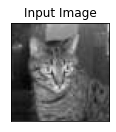

In [14]:
# Display Resized Input Image
plt.subplot(131),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

In [15]:
# The output of DFT consists of complex values, in order to display it we need perform following calculation
DFT_Display = 20*np.log10(np.abs(DFT2D))

(Text(0.5, 1.0, 'DFT'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

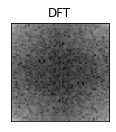

In [16]:
# Displaying output of DFT
plt.subplot(132),plt.imshow(DFT_Display,cmap='gray')
plt.title('DFT'), plt.xticks([]), plt.yticks([])

In [17]:
# Saving output of DFT
plt.imsave('DFT.png', DFT_Display, cmap='gray')

(Text(0.5, 1.0, 'IDFT'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

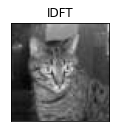

In [18]:
# Displaying output of IDFT
plt.subplot(133),plt.imshow(Output,cmap='gray')
plt.title('IDFT'), plt.xticks([]), plt.yticks([])

In [19]:
# Saving output of IDFT
plt.imsave("IDFT.png", Output, cmap='gray')

In [20]:
plt.show()